In [15]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt
import random
import time
import os

# Parameters
num_uavs_team = 4
num_vertices = 100
UAV_speed = 5                          # m/s
Flight_time = 20                        # Maximum flight time in hours
major_ax = UAV_speed * 60 * Flight_time # Major axis calculation based on UAV speed and a factor
charging_station = np.array([50, 100], dtype=float)
magma_colors = plt.get_cmap('magma')(np.linspace(0, 1, num_vertices))

x_data = np.random.randint(0, 101, size=num_vertices)  # Random x coordinates between 0 and 100
y_data = np.random.randint(0, 101, size=num_vertices)  # Random y coordinates between 0 and 100
x_data[0] = 50
y_data[0] = 100

# Select random start and end points
start_point = 0
end_point = 0

s_point = (x_data[start_point], y_data[start_point])
e_point = (x_data[end_point], y_data[end_point])

input_data = []
for i in range(num_vertices):
    point = (x_data[i], y_data[i])
    # Check if the point is the start or end point and within the allowable distance in one go
    if point != s_point and point != e_point and \
       math.sqrt((s_point[0] - point[0])**2 + (s_point[1] - point[1])**2) + \
       math.sqrt((e_point[0] - point[0])**2 + (e_point[1] - point[1])**2) <= major_ax:
        input_data.append(point)

# input_data = list(set(input_data)) # 리스트 중복제거
inputtuple = list(map(tuple,(input_data)))
# if s_point in input_data:
#     input_data.remove(s_point)
# if e_point in input_data:
#     input_data.remove(e_point)
inputcorr = inputtuple[:] 

nbofnodes = []
distconsmp = []
global route_set
route_set = []
teamscore = 0 # the number of rtop nodes
p = 5 # (%)
iproute = route_set[:]
K = 10
I = 100

In [20]:
input_data

[(62, 14),
 (80, 85),
 (45, 41),
 (86, 54),
 (47, 97),
 (96, 79),
 (96, 65),
 (88, 14),
 (86, 22),
 (33, 55),
 (7, 2),
 (13, 9),
 (63, 4),
 (0, 80),
 (27, 25),
 (20, 22),
 (64, 77),
 (32, 47),
 (40, 61),
 (82, 72),
 (20, 27),
 (58, 77),
 (94, 0),
 (1, 31),
 (46, 18),
 (54, 56),
 (19, 90),
 (23, 32),
 (13, 53),
 (68, 65),
 (55, 84),
 (19, 16),
 (44, 63),
 (19, 60),
 (17, 28),
 (74, 24),
 (40, 58),
 (78, 53),
 (7, 23),
 (21, 71),
 (75, 23),
 (31, 53),
 (68, 16),
 (25, 49),
 (21, 40),
 (72, 61),
 (38, 13),
 (2, 15),
 (64, 16),
 (85, 93),
 (30, 98),
 (77, 59),
 (53, 85),
 (66, 24),
 (63, 8),
 (9, 22),
 (44, 25),
 (39, 13),
 (40, 35),
 (84, 7),
 (51, 71),
 (9, 83),
 (60, 8),
 (77, 98),
 (76, 100),
 (86, 71),
 (15, 1),
 (54, 49),
 (52, 30),
 (81, 44),
 (0, 90),
 (45, 16),
 (79, 26),
 (80, 82),
 (40, 27),
 (75, 29),
 (8, 59),
 (38, 18),
 (79, 14),
 (75, 98),
 (77, 6),
 (49, 68),
 (68, 19),
 (78, 53),
 (31, 34),
 (97, 48),
 (18, 2),
 (96, 47),
 (48, 16),
 (74, 45),
 (31, 32),
 (29, 57),
 (44, 

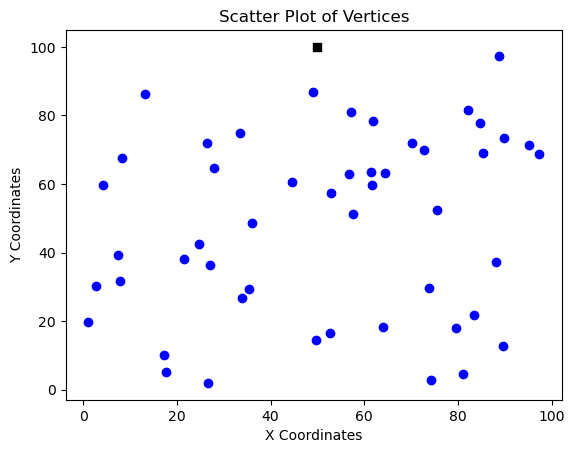

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the vertices
num_vertices = 50
vertices = np.array([
    [1.1, 19.9],
    [2.8, 30.4],
    [4.2, 59.6],
    [7.4, 39.3],
    [7.9, 31.6],
    [8.3, 67.6],
    [13.1, 86.4],
    [17.3, 10.1],
    [17.7, 5.2],
    [21.6, 38.1],
    [24.7, 42.5],
    [26.4, 72.0],
    [26.7, 2.0],
    [27.0, 36.4],
    [27.9, 64.7],
    [33.4, 74.9],
    [33.8, 26.9],
    [35.4, 29.4],
    [36.1, 48.6],
    [44.6, 60.5],
    [49.1, 86.8],
    [49.7, 14.6],
    [52.6, 16.7],
    [52.8, 57.4],
    [56.8, 62.8],
    [57.2, 80.9],
    [57.6, 51.2],
    [61.5, 63.4],
    [61.7, 59.6],
    [61.8, 78.4],
    [64.1, 18.4],
    [64.5, 63.3],
    [70.2, 71.9],
    [72.8, 69.9],
    [73.8, 29.6],
    [74.3, 2.8],
    [75.6, 52.4],
    [79.6, 18.1],
    [81.0, 4.5],
    [82.1, 81.5],
    [83.4, 21.7],
    [84.7, 77.8],
    [85.4, 69.1],
    [88.1, 37.3],
    [88.7, 97.4],
    [89.7, 12.9],
    [89.9, 73.4],
    [95.1, 71.4],
    [97.4, 68.9]
])
# Extract x and y coordinates
x_coords = vertices[:, 0]
y_coords = vertices[:, 1]

# Create the scatter plot
plt.scatter(x_coords, y_coords, color='blue', marker='o')
plt.scatter(50, 100, color='black', marker='s')

# Add labels and title
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Scatter Plot of Vertices')

# Display the plot
plt.show()

In [69]:
def dist(points):
    total_distance = 0.0
        
    # Iterate through the points and sum the distances between consecutive points
    for i in range(1, len(points)):
        total_distance += np.linalg.norm(np.array(points[i]) - np.array(points[i-1]))
    
    return total_distance
p_5m_5to9_32to36 = [[50, 100], [7.4, 39.3], [7.9, 31.6], [1.1, 19.9], [2.8, 30.4], [50, 100]] # 4753.4403
p_4m_1to4 = [[50, 100], [4.2, 59.6], [8.3, 67.6], [13.1, 86.4], [50, 100]] # 3219.7768
p_6m_31to36 = [[50, 100], [33.4, 74.9], [26.4, 72.0], [27.9, 64.7], [24.7, 42.5], [21.6, 38.1], [27.0, 36.4], [17.3, 10.1], [17.7, 5.2], [26.7, 2.0], [33.8, 26.9], [35.4, 29.4], [36.1, 48.6], [44.6, 60.5], [50, 100]] # 5591.5005
p_3m_4to6_28to30 = [[50, 100], [95.1, 71.4], [97.4, 68.9], [50, 100]] # 2837.3196
p_3m_10to12_22to24_34to36 = [[50, 100], [88.7, 97.4], [89.9, 73.4], [84.7, 77.8], [82.1, 81.5], [50, 100]] # 2780.0143
p_10m_13to22 = [[50, 100], [85.4, 69.1], [88.1, 37.3], [89.7, 12.9], [81.0, 4.5], [74.3, 2.8], [49.7, 14.6], [26.7, 2.0], [17.7, 5.2], [17.3, 10.1], [52.6, 16.7], [64.1, 18.4], [79.6, 18.1], [83.4, 21.7], [73.8, 29.6], [75.6, 52.4], [57.6, 51.2], [52.8, 57.4], [56.8, 62.8], [61.7, 59.6], [61.5, 63.4], [64.5, 63.3], [61.8, 78.4], [57.2, 80.9], [50, 100]] # 9504.0887
p_5m_14to18_23to27 =[[50, 100], [49.1, 86.8], [44.6, 60.5], [35.4, 29.4], [33.8, 26.9], [27.0, 36.4], [21.6, 38.1], [24.7, 42.5], [36.1, 48.6], [27.9, 64.7], [26.4, 72.0], [33.4, 74.9], [50, 100]] # 4353.9823
p_3m_16to18 = [[50, 100], [70.2, 71.9], [72.8, 69.9], [44.6, 60.5], [50, 100]] # 2687.0035
p_2m = [[50, 100], [70.2, 71.9], [61.8, 78.4], [57.2, 80.9], [50, 100]]

points = [[50, 100], [70.2, 71.9], [61.8, 78.4], [57.2, 80.9], [50, 100]]
total_distance = dist(points)*25
print(f"Total path distance: {total_distance:.4f}")

Total path distance: 1771.8937


In [ ]:
path_uav0 = []
path_uav0.extend(p_3m_4to6_28to30)  # 4~6 프레임
path_uav0.extend(p_3m_10to12_22to24_34to36)  # 10~12 프레임
path_uav0.extend(p_3m_16to18)  # 16~18 프레임
path_uav0.extend(p_3m_10to12_22to24_34to36)  # 22~24 프레임
path_uav0.extend(p_3m_4to6_28to30)  # 28~30 프레임
path_uav0.extend(p_3m_10to12_22to24_34to36)  # 34~36 프레임

path_uav1 = []
path_uav1.extend(p_5m_5to9_32to36)
path_uav1.extend(p_5m_14to18_23to27)
path_uav1.extend(p_5m_14to18_23to27)
path_uav1.extend(p_5m_5to9_32to36)

path_uav2 = []
path_uav2.extend(p_4m_1to4)
path_uav2.extend(p_10m_13to22)
path_uav2.extend(p_6m_31to36)
